In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("data.csv")
df


,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1.0,3.0,3.0,1967.0,1.0,1.0,48.0,8.297631,5.935734,6021
1,2,287.678577,1.0,2.0,1.0,1949.0,0.0,1.0,37.0,6.061466,10.827392,5914
2,3,232.998485,1.0,3.0,2.0,1923.0,1.0,0.0,14.0,2.911442,6.904599,4645
3,4,199.664621,5.0,2.0,2.0,1918.0,0.0,0.0,17.0,2.070949,8.284019,5831
4,5,89.004660,4.0,3.0,3.0,1999.0,1.0,0.0,34.0,1.523278,14.648277,6199
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,138.338057,2.0,2.0,2.0,1967.0,1.0,0.0,16.0,4.296086,5.562583,4885
496,497,195.914028,2.0,3.0,1.0,1977.0,0.0,1.0,45.0,7.406261,2.845105,6577
497,498,69.433659,1.0,1.0,2.0,2004.0,0.0,0.0,18.0,8.629724,6.263264,4053
498,499,293.598702,5.0,1.0,3.0,1940.0,1.0,0.0,41.0,5.318891,16.990684,7730


In [6]:

# Drop rows with missing values
df_clean = df.dropna()
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  470 non-null    int64  
 1   Square_Feet         470 non-null    float64
 2   Num_Bedrooms        470 non-null    float64
 3   Num_Bathrooms       470 non-null    float64
 4   Num_Floors          470 non-null    float64
 5   Year_Built          470 non-null    float64
 6   Has_Garden          470 non-null    float64
 7   Has_Pool            470 non-null    float64
 8   Garage_Size         470 non-null    float64
 9   Location_Score      470 non-null    float64
 10  Distance_to_Center  470 non-null    float64
 11  Price               470 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 47.7 KB


c:\Users\khan2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\khan2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\khan2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\khan2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\khan2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\khan2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because n

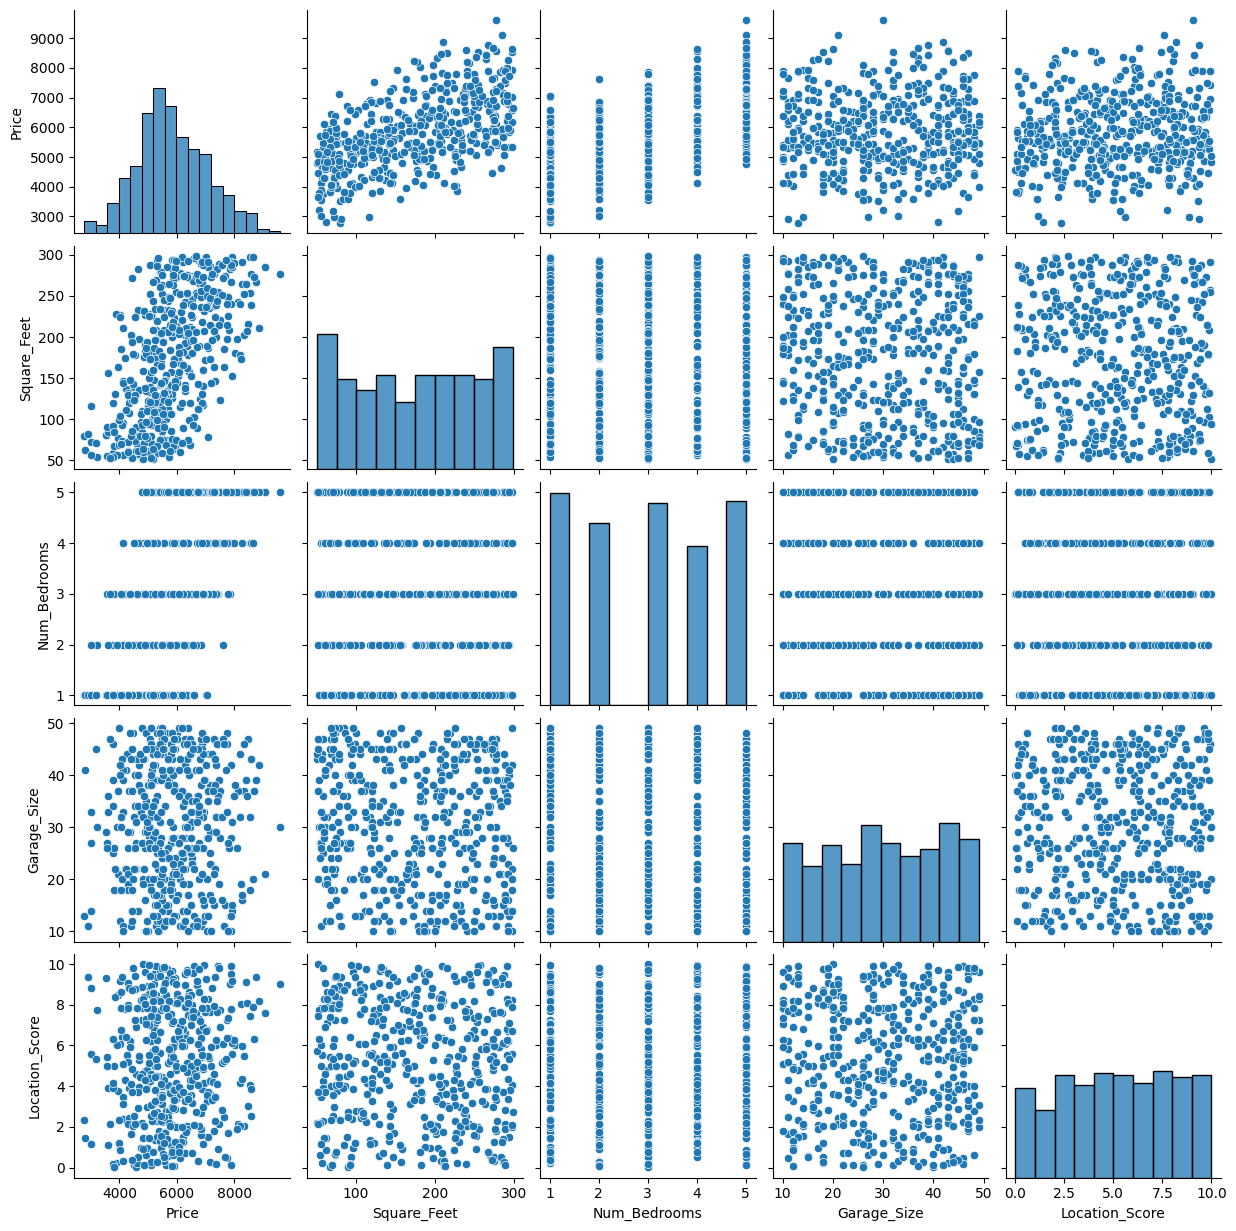

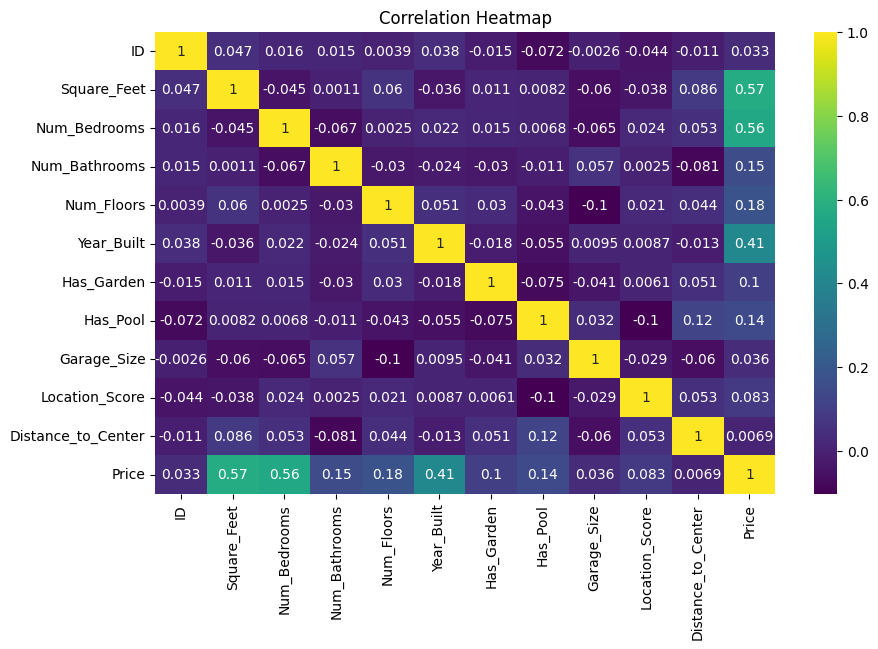

In [14]:

# Pairplot for selected features
sns.pairplot(
    df_clean[["Price", "Square_Feet", "Num_Bedrooms", "Garage_Size", "Location_Score"]],
    palette="Set2"  
)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.corr(), annot=True, cmap="viridis")  
plt.title("Correlation Heatmap")
plt.show()



In [8]:

# Prepare X and y
X = df_clean.drop(columns=["ID", "Price"]).values
y = df_clean["Price"].values.reshape(-1, 1)

# Add intercept term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Closed-form solution (Normal Equation)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Predictions
y_pred = X_b.dot(theta_best)


In [9]:

# Mean Squared Error and RSS
mse = np.mean((y - y_pred) ** 2)
rss = np.sum((y - y_pred) ** 2)

print("Mean Squared Error (MSE):", mse)
print("Residual Sum of Squares (RSS):", rss)
print("Model Coefficients:")
print(theta_best.ravel())


Mean Squared Error (MSE): 35906.80793740057
Residual Sum of Squares (RSS): 16876199.730578266
Model Coefficients:
[-2.87338195e+04  1.01739362e+01  5.05447199e+02  2.95902915e+02
  2.15230472e+02  1.50690894e+01  2.98804288e+02  4.79540958e+02
  1.13504634e+01  4.81381638e+01 -2.01031809e+01]


In [10]:
from sklearn.preprocessing import StandardScaler

# Standardize the features (excluding the target)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add intercept
X_scaled_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Fit linear regression using matrix method
theta_std = np.linalg.inv(X_scaled_b.T @ X_scaled_b) @ X_scaled_b.T @ y
y_pred_std = X_scaled_b @ theta_std

# Evaluate
mse_std = np.mean((y - y_pred_std) ** 2)
rss_std = np.sum((y - y_pred_std) ** 2)

print("Standardized Features:")
print("MSE:", mse_std)
print("RSS:", rss_std)

  

Standardized Features:
MSE: 35906.80793740053
RSS: 16876199.73057825


In [11]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit using matrix method
theta_poly = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
y_pred_poly = X_poly @ theta_poly

# Evaluate
mse_poly = np.mean((y - y_pred_poly) ** 2)
rss_poly = np.sum((y - y_pred_poly) ** 2)

print("Polynomial Features (Degree 2):")
print("MSE:", mse_poly)
print("RSS:", rss_poly)


Polynomial Features (Degree 2):
MSE: 1.1961645369734043e+39
RSS: 5.621973323775e+41
